In [1]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException

In [18]:
driver = webdriver.Chrome(executable_path = '/Users/Vishal/Documents/chromedriver')
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="8f412b833bb3401de4e3875e33b28929")>

In [19]:
#Login
driver.get('https://www.instagram.com/')  
driver.implicitly_wait(5)
uname = driver.find_element_by_name('username')
uname.send_keys(sample_username)
pw = driver.find_element_by_name('password')
pw.send_keys(sample_password)
login = driver.find_element_by_xpath('//button/div[contains(@class, "Igw0E")]')
login.click()
driver.implicitly_wait(5)

#Dealing with the notifications popup
try:
    decline_notifs = driver.find_element_by_xpath('//button[contains(@class, "HoLwm")]')
    decline_notifs.click()
except NoSuchElementException:
    pass

# Top 5 "food" handles out of the first 10

In [15]:
#Goes through the top 5 handles out of the first 10, on the basis of the number of followers and retrieves the number of posts in the last three days
from datetime import datetime
curr_date = datetime.now()
follower_count = dict()
post_count = dict()
count = 0
food_search_index = 0

while(count < 10): #for the first 10 handles only, one loop iteration for each handle
    search_box = driver.find_element_by_xpath('//div[contains(@class, "LWmhU")]/input')
    search_box.send_keys('food') #search keyword
    driver.implicitly_wait(5)
    food = driver.find_elements_by_class_name('Ap253')
    driver.implicitly_wait(5)
    while True: #skip the search result if it's a hashtag
        obj = food[food_search_index]
        if '#' in obj.text:
            food_search_index += 1
            continue
        else:
            break
    obj.click()
    driver.implicitly_wait(5)
    
    #to get the number of followers for this handle
    followers = driver.find_element_by_xpath('//a[contains(@class, "-nal3 ")]/span')
    foll = followers.get_attribute("title")
    name = driver.find_element_by_class_name('fKFbl')
    if ',' in foll:
        foll = foll.split(',')
        foll_str = foll[0] + foll[1]
        foll_int = int(foll_str)
    else:
        foll_int = int(foll)
    follower_count[name.text] = foll_int
    
    
    #going through the posts of the handle
    posts = driver.find_elements_by_class_name('_9AhH0')
    for post in posts:
        driver.execute_script("arguments[0].click();", post)
        driver.implicitly_wait(20)
        #retrieving the date on which the post was uploaded
        date_string = driver.find_element_by_class_name('Nzb55').get_attribute('title')
        date_object = datetime.strptime(date_string, "%b %d, %Y")
        
        #considering and counting the post only if it was posted withing the last three days from now
        diff = curr_date - date_object
        if diff.days < 3:
            post_count[name.text] = post_count.get(name.text, 0) + 1
        else:
            close = driver.find_element_by_class_name('yiMZG')
            close.click()
            break
        close = driver.find_element_by_class_name('yiMZG')
        close.click()
    
    driver.get('https://www.instagram.com/')
    driver.implicitly_wait(10)
    count += 1
    food_search_index += 1

Top 10 search results for the keyword "food":
dilsefoodie
foodtalkindia
yourfoodlab
foodinsider
buzzfeedfood
foodgod
food
foodwithseoul
foodie_incarnate
foodnetwork

Top 5 handles with the most number of followers:
dilsefoodie  : 406177  
foodtalkindia  : 294234  
foodie_incarnate  : 169852  
foodwithseoul  : 32476  
food  : 19045  


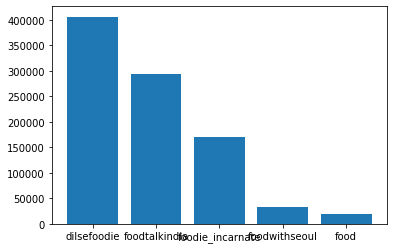

In [6]:
#Displaying the first 10 results
#Then displaying the top 5 out of them on the basis of number of followers
#Then depicting those top 5 on a bar graph
import matplotlib.pyplot as plt
from collections import Counter
print('Top 10 search results for the keyword "food":')
for key in follower_count:
    print(key)
print('\nTop 5 handles with the most number of followers:')
k = Counter(follower_count)
top = k.most_common(5)
x_top = []
y_top = []
for i in top: 
    x_top.append(i[0])
    y_top.append(i[1])
    print(i[0]," :",i[1]," ")
    
plt.bar(x_top, y_top)
plt.show()

Number of posts in last 3 days:
dilsefoodie 2
foodtalkindia 2
yourfoodlab 4
foodinsider 1
foodgod 1
food 5
foodie_incarnate 4
foodnetwork 12


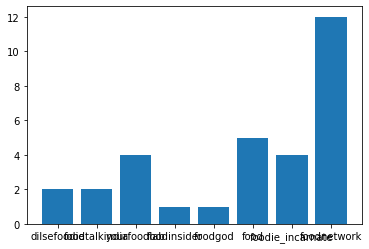

In [16]:
#Displaying the number of posts in the last three days by each handle
print('Number of posts in last 3 days:')
for key in post_count:
    print(key, post_count[key])
x_posts = post_count.keys()
y_posts = post_count.values()
plt.bar(x_posts, y_posts)
plt.show()

# Word Frequency and Hashtag Frequency of the top 5 "food" handles

In [22]:
import string
hash_count = dict() #frequency for each hashtag
word_count = dict() #frequency for each word
count = 0
food_search_index = 0
while(count < 5): #for the top 5 handles only, one loop iteration for each handle
    search_box = driver.find_element_by_xpath('//div[contains(@class, "LWmhU")]/input')
    search_box.send_keys('food')
    driver.implicitly_wait(5)
    food = driver.find_elements_by_class_name('Ap253')
    driver.implicitly_wait(5)
    while True:
        obj = food[food_search_index]
        if obj.text.strip() not in x_top:
            food_search_index += 1
            continue
        else:
            break
    obj.click()
    driver.implicitly_wait(5)
    name = driver.find_element_by_class_name('fKFbl')
    count += 1
    
    posts = driver.find_elements_by_class_name('_9AhH0')
    count2 = 0
    for post in posts:
        if count2 == 10: #First 10 posts for each handle
            break
        driver.execute_script("arguments[0].click();", post)
        driver.implicitly_wait(20)
        caption = driver.find_element_by_xpath('//div[contains(@class, "C4VMK")]/span')
        txt = caption.text.split(' ')
        for word in txt:
            if len(txt) == 0:
                break
            if len(word.strip()) == 0:
                continue
            if word.strip()[0] == '#': #if the word begins with a '#', it's a hadhtag, otherwise a normal word
                hash_count[word.strip()] = hash_count.get(word.strip(), 0) + 1
            else:
                word_count[word.strip(string.punctuation).lower()] = word_count.get(word.strip(string.punctuation).lower(), 0) + 1

        close = driver.find_element_by_class_name('yiMZG')
        close.click()
        count2 += 1
    
    driver.get('https://www.instagram.com/')
    driver.implicitly_wait(10)
    food_search_index += 1

#food  : 5  
#yum  : 5  
#foodie  : 4  
#foodstagram  : 4  
#delicious  : 4  


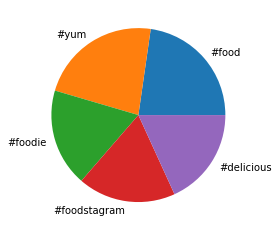

In [23]:
#Displaying the top 5 hashtags used in all these posts from the top 5 handles
k = Counter(hash_count)
top = k.most_common(5)
x_hash = []
y_hash = []
for i in top: 
    x_hash.append(i[0])
    y_hash.append(i[1])
    print(i[0]," :",i[1]," ")
    
plt.pie(y_hash, labels = x_hash)
plt.show()

In [24]:
#Writing the word_count dictionary to a csv file
import pandas as pd

(pd.DataFrame.from_dict(data=word_count, orient='index')
   .to_csv('new_dict_file.csv', header=False))

# Likes to Followers Ratio for top 5 "food" handles

In [12]:
like_count = dict() #contains the total sum of likes on the first 10 posts of the top 5 handles
follower_count = dict() #contains the number of followers for each of these handles
count = 0
food_search_index = 0
while(count < 5):
    search_box = driver.find_element_by_xpath('//div[contains(@class, "LWmhU")]/input')
    search_box.send_keys('food')
    driver.implicitly_wait(5)
    food = driver.find_elements_by_class_name('Ap253')
    driver.implicitly_wait(5)
    while True:
        obj = food[food_search_index]
        if obj.text.strip() not in x_top:
            food_search_index += 1
            continue
        else:
            break
    obj.click()
    driver.implicitly_wait(5)
    name = driver.find_element_by_class_name('fKFbl')
    
    #retrieving followers
    followers = driver.find_element_by_xpath('//a[contains(@class, "-nal3 ")]/span')
    foll = followers.get_attribute("title")
    name = driver.find_element_by_class_name('fKFbl')
    if ',' in foll:
        foll = foll.split(',')
        foll_str = foll[0] + foll[1]
        foll_int = int(foll_str)
    else:
        foll_int = int(foll)
    follower_count[name.text] = foll_int
    count += 1
    
    posts = driver.find_elements_by_class_name('_9AhH0')
    count2 = 0
    for post in posts:
        if count2 == 10:
            break
        driver.execute_script("arguments[0].click();", post)
        driver.implicitly_wait(20)
        
        #try block contains code to view the number of likes on a video
        #in case of a video post, the page initially shows the number of views, to view the number of likes we first need to click on the number of views
        try:
            views = driver.find_element_by_xpath('//div[contains(@class, "HbPOm")]/span/span')
            views.click()
            like = driver.find_element_by_xpath('//div[contains(@class, "vJRqr")]/span')
            likes = like.text
            if ',' in likes:
                likes = likes.split(',')
                likes_str = likes[0].strip() + likes[1].strip()
                likes_int = int(likes_str)
            else:
                likes_int = int(likes)
            like_count[name.text] = like_count.get(name.text, 0) + likes_int
            esc = driver.find_element_by_class_name('QhbhU')
            esc.click()
        
        #except block contains the code to view the number of likes in case it's a photo post, in which the number of likes is visible straightaway
        except NoSuchElementException:
            like = driver.find_element_by_xpath('//button[contains(@class, "yWX7d")]/span')
            likes = like.text
            if ',' in likes:
                likes = likes.split(',')
                likes_str = likes[0].strip() + likes[1].strip()
                likes_int = int(likes_str)
            else:
                likes_int = int(likes)
            like_count[name.text] = like_count.get(name.text, 0) + likes_int
            
        close = driver.find_element_by_class_name('yiMZG')
        close.click()
        count2 += 1
    
    driver.get('https://www.instagram.com/')
    driver.implicitly_wait(10)
    food_search_index += 1

In [13]:
#Printing the average number of likes for each handle, Total likes for first 10 posts divided by 10
print('Average likes for the Instagram handles:')
for key in like_count:
    print(key, like_count[key]/10)

Average likes for the Instagram handles:
dilsefoodie 9389.7
foodtalkindia 381.9
food 346.4
foodwithseoul 263.4
foodie_incarnate 8631.4


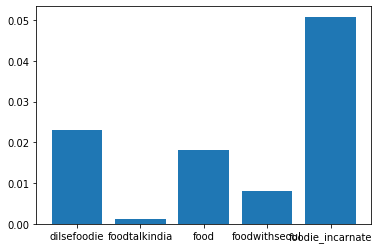

In [14]:
#Depicting the likes to followers ratio on a bar graph
x_avg = []
y_avg = []
for key in like_count:
    x_avg.append(key)
    y_avg.append(like_count[key]/(follower_count[key] * 10))
plt.bar(x_avg, y_avg)
plt.show()